In [9]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

# il faut integrer les volumes dans la data ce qu on donne c est uniquement des zeros 

In [10]:
from _on_balance_volume import OnBalanceVolume

In [11]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [12]:
data=pd.read_csv("MASI.csv",parse_dates=True, index_col=0)

In [13]:
data.Volume

Date
2018-01-02    0
2018-01-03    0
2018-01-04    0
2018-01-05    0
2018-01-08    0
             ..
2022-03-28    0
2022-03-29    0
2022-03-30    0
2022-03-31    0
2022-04-01    0
Name: Volume, Length: 1056, dtype: int64

In [14]:
OnBalanceVolume(data)

NameError: name 'np' is not defined

In [8]:
df=data["Close"].loc["2018-01-02":]
high=data["High"].loc["2018-01-02":]
low=data["Low"].loc["2018-01-02":]


## Fonction

In [9]:
premier=0 

In [10]:
# Coût des transactions
ti=0.0022
fr=0.0011
cb=0.0011
taux=ti+fr+cb

In [11]:
def pmv(close,signal):
	"""
		La Plus-ou-moins-value
	"""
	close=np.array(close)
	signal=np.array(signal.fillna(0))
	qt=signal.cumsum()
	achat= np.where(signal>=1,1,0)
	PDR=[]
	for t in range(len(close)):
		p=(close[:t+1]*achat[:t+1]).sum()
		if achat[:t+1].sum()==0 :
			val=0
		else :
			p=p/(achat[:t+1].sum())
			val=qt[t]*p 
		PDR.append(val)
	PMV_lat=close*qt-PDR
	PMV_re=[0]
	for i in range(1,len(close)):
		vl=PDR[i]-PDR[i-1]+PMV_re[i-1]-close[i]*signal[i]
		PMV_re.append(vl)
	PMV=PMV_lat+PMV_re
	return PMV

In [12]:
def adjustsignal(signal):
	sig=[]
	qtite=0
	for i in signal:
		if i > 0 :
			sig.append(i)
			qtite+=1
		elif i < 0:
			if qtite >= abs(i) :
				sig.append(i)
				qtite+=-i
			else:
				sig.append(0)
		else:
			sig.append(0)
	return sig

## OBV

In [47]:
def obj_obv(n):
	n=int(n[0])
	signal=pd.DataFrame(index=df.index)
	ob=
	#ob=at.obv(df,vol)["OBV"]
	obs=pd.Series(ob.rolling(n).mean(), name='obvsignal')
	signal["compa"]=np.nan 
	signal["compa"][n:]=np.where( ob[n:]  > obs[n:],1,0)
	signal["signal"]=at.adjustsignal(signal["compa"].diff())
	cours=df*(1+taux*signal["signal"])
	pmval=at.pmv(cours,signal["signal"])
	return pmval.max(),

gen	nevals	max   	avg    
0  	40    	5710.3	3323.86
1  	35    	5710.3	4130.23
2  	38    	5710.3	4701.1 
3  	36    	5710.3	4946.22
4  	40    	5710.3	5342.56
5  	36    	5710.3	5381.72
6  	35    	5710.3	5453.75
Hall of Fame Individuals = 
[32.00117617118097]
[32]
[30.03476200420938]
[10.489186803722037]
[10.105610197964031]
Best Ever Individual =  [32]


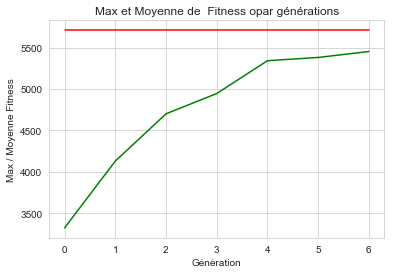

In [48]:
GeneticAlgo(1,obj_obv,6,10,100)